# **Project Name - Shopping Trends Analysis**

### **Developed By:** Sonali Thule 

# **Problem Statement**

**The problem is to analyze customer purchase behavior in an e-commerce platform,
focusing on factors like product categories, payment methods, shipping types, discounts, and seasonal trends.
The challenge lies in extracting actionable insights from large transaction data to optimize marketing strategies, enhance customer satisfaction, and improve sales performance.**

# **Objective**

**Customer Purchase Behavior Analysis: Analyze customer data to understand purchasing patterns, including frequency, preferred payment methods, and product categories.**

**Seasonal Trends Identification: Identify and evaluate seasonal purchasing trends for different product categories such as clothing, footwear, accessories, and outerwear.**

**Discount Effectiveness: Assess the impact of discount promotions on customer purchase decisions and overall sales.**

**Payment Method Preference: Study customer preferences for payment methods (credit card, PayPal, Venmo, etc.) and how it correlates with the frequency of purchases.**

**Shipping Type Analysis: Analyze the relationship between shipping methods (e.g., express, standard, free shipping) and customer satisfaction or repeat purchases.**

**Review and Rating Analysis: Investigate how product reviews and ratings influence future purchases and customer loyalty.**

**Customer Segmentation: Segment customers based on demographic data (age, location) and purchase behavior to enable targeted marketing strategies.**

**Promotional Strategy Evaluation: Evaluate the effectiveness of various promotional codes and discounts in driving sales during different seasons.**

# *Understanding Variable*


**PurchaseID**: A unique transaction identifier for tracking individual purchases.  

**CustomerID**: A unique identifier representing each customer, enabling customer-level analysis.  

**Age**: The age of the customer, used for demographic and segmentation analysis.  

**Gender**: The gender of the customer, useful for understanding customer preferences and trends.  

**Location**: The customer's geographical location, aiding in regional trend analysis and targeted marketing. 

**ProductName**: The specific name of the product purchased, used for product-level insights.  

**Category**: The product's classification, such as Clothing, Footwear, or Accessories, to analyze category-wise trends. 

**Size**: The size of the product purchased, relevant for inventory and sales planning.  

**Color**: The product’s color, helping in trend analysis and understanding customer preferences.  

**Season**: The season associated with the purchase or product (e.g., Winter, Summer), to evaluate seasonal trends. 

**PurchaseAmount_USD**: The amount spent by the customer in USD, used for revenue and sales analysis.  

**DiscountApplied**: Indicates if a discount was applied (1 = Yes, 0 = No), helping to assess the impact of promotions on sales.  

**PreferredPaymentMethod**: The payment method chosen by the customer (e.g., Credit Card, PayPal), used to analyze payment trends.  

**ShippingTypeName**: The type of shipping selected (e.g., Free Shipping, Express), helping to understand customer preferences and shipping cost impact.  

**ReviewRating**: The rating or review score given by the customer for the product, useful for gauging product satisfaction and quality.

# *Github Link*

### *https://github.com/Sonali28-T/Sprint_2*

# *Import necessary packages*

In [1]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Insight**   Imported all necessary packages

# *Establishes a Connection to localhost  Mysql Database*

In [2]:
db_connection = mysql.connector.connect(
user='root',
password='security',
host='localhost',
database='shoppingtrenddb',# write here database name 
port='3306'
)

**Insight**         
The code establishes a connection to a locally hosted MySQL database (shoppingtrenddb) using the mysql.connector.connect method, allowing you to perform SQL
operations in Python. Ensure to manage sensitive data securely and handle errors appropriately.

In [3]:
query = """
SELECT
    pur.PurchaseID,
    c.CustomerID,
    c.Age, 
    c.Gender,
    c.Location,
    pr.ProductName,
    pr.Category,
    pur.Size, 
    pur.Color, 
    pur.Season,
    pur.PurchaseAmount_USD,
    pur.DiscountApplied,
	c.PreferredPaymentMethod,
    sh.ShippingTypeName,
    pur.ReviewRating
from purchases pur
INNER JOIN customers c ON pur.CustomerID = c.CustomerID
INNER JOIN products pr ON pur.ProductID = pr.ProductID
INNER JOIN shippingtypes sh ON pur.ShippingTypeID = sh.ShippingTypeID
"""

**Insight**
This SQL query retrieves purchase details, customer information, product attributes, and shipping type for each purchase, combining data from four tables using inner joins.

# *Dataset View*

In [4]:
# Load the data into a pandas DataFrame using the SQL query and database connection
df = pd.read_sql(query, db_connection)
df_sorted = df.sort_values(by='CustomerID')  # Sort the DataFrame by 'CustomerID' column
df_sorted = df_sorted.reset_index(drop=True)  # Reset the index of the sorted DataFrame to be sequential
df1=df_sorted # Assign the sorted DataFrame to a new variable 'df1'

# Print the DataFrame 'df1' to check the result
print(df1)

   PurchaseID CustomerID  Age  Gender        Location ProductName  \
0        P001        C01   55    Male        Kentucky      Blouse   
1        P002        C02   19  Female           Maine     Sweater   
2        P003        C03   50    Male   Massachusetts       Jeans   
3        P004        C04   21  Female    Rhode Island     Sandals   
4        P005        C05   45  Female          Oregon      Blouse   
5        P006        C06   46    Male         Wyoming    Sneakers   
6        P007        C07   63  Female         Montana       Shirt   
7        P008        C08   27    Male       Louisiana      Shorts   
8        P009        C09   26  Female   West Virginia        Coat   
9        P010        C10   57    Male        Missouri     HandBag   
10       P011        C11   53    Male        Arkansas       Shoes   
11       P012        C12   30  Female          Hawaii      Shorts   
12       P013        C13   61    Male        Delaware        Coat   
13       P014        C14   65  Fem

C:\Users\Sonal\AppData\Local\Temp\ipykernel_15112\1790199922.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, db_connection)


**Insight**   

This code loads data from the database using the SQL query, sorts the DataFrame by `CustomerID`, resets the index to be sequential, and stores the result in `df1` before printing it.

In [5]:
df1.shape  # Get the shape of 'df1' or dataframe (number of rows and columns)

(50, 15)

**Insight** 

It will return a tuple representing the dimensions of the DataFrame df1, where the first value is the number of rows and the second value is the number of columns.

In [6]:
df1.head() # Display the first few rows of the data

,PurchaseID,CustomerID,Age,Gender,Location,ProductName,Category,Size,Color,Season,PurchaseAmount_USD,DiscountApplied,PreferredPaymentMethod,ShippingTypeName,ReviewRating
0,P001,C01,55,Male,Kentucky,Blouse,Clothing,L,Gray,Winter,53.0,1,Credit Card,Express,3.1
1,P002,C02,19,Female,Maine,Sweater,Clothing,L,Maroon,Winter,64.0,1,Bank Transfer,Express,3.1
2,P003,C03,50,Male,Massachusetts,Jeans,Clothing,S,Maroon,Spring,73.0,1,Cash,Free Shipping,3.1
3,P004,C04,21,Female,Rhode Island,Sandals,Footwear,M,Maroon,Spring,90.0,1,PayPal,Next Day Air,3.5
4,P005,C05,45,Female,Oregon,Blouse,Clothing,M,Turquoise,Spring,49.0,0,Cash,Free Shipping,2.7


**Insight**  
 It gives a quick preview of the dataset, showing the first 5 rows.

In [7]:
df1.tail() # Display the last 5 rows of 'df1' to inspect the end of the dataset

,PurchaseID,CustomerID,Age,Gender,Location,ProductName,Category,Size,Color,Season,PurchaseAmount_USD,DiscountApplied,PreferredPaymentMethod,ShippingTypeName,ReviewRating
45,P046,C46,50,Male,Tennessee,Socks,Clothing,XL,Indigo,Fall,21.0,1,Venmo,2-Day Shipping,2.9
46,P047,C47,57,Female,California,Shirt,Clothing,L,White,Summer,43.0,1,Venmo,Store Pickup,2.9
47,P048,C48,55,Female,Montana,Jewelry,Accessories,M,Charcoal,Winter,54.0,0,Debit Card,Free Shipping,4.5
48,P049,C49,42,Male,Nevada,Shirt,Clothing,M,Orange,Summer,55.0,1,Debit Card,Store Pickup,2.7
49,P050,C50,68,Female,New Jersey,Hoodie,Clothing,S,Indigo,Spring,30.0,1,Bank Transfer,Next Day Air,4.6


**Insight**   

It shows the last 5 rows of the dataset, which is useful for checking if there are any unexpected values or inconsistencies at the end of the data.

In [8]:
df1.columns

Index(['PurchaseID', 'CustomerID', 'Age', 'Gender', 'Location', 'ProductName',
       'Category', 'Size', 'Color', 'Season', 'PurchaseAmount_USD',
       'DiscountApplied', 'PreferredPaymentMethod', 'ShippingTypeName',
       'ReviewRating'],
      dtype='object')

**Insight**  It provides a list of all the column names in the DataFrame

# *Dataset Information*

In [9]:
# Display a concise summary of the DataFrame 'df', including the number of entries, 
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PurchaseID              50 non-null     object 
 1   CustomerID              50 non-null     object 
 2   Age                     50 non-null     int64  
 3   Gender                  50 non-null     object 
 4   Location                50 non-null     object 
 5   ProductName             50 non-null     object 
 6   Category                50 non-null     object 
 7   Size                    50 non-null     object 
 8   Color                   50 non-null     object 
 9   Season                  50 non-null     object 
 10  PurchaseAmount_USD      50 non-null     float64
 11  DiscountApplied         50 non-null     int64  
 12  PreferredPaymentMethod  50 non-null     object 
 13  ShippingTypeName        50 non-null     object 
 14  ReviewRating            50 non-null     floa

**Insight**  

It provides an overview of the dataset, showing the total number of entries, data types of each column, and the count of non-null values. This helps identify missing data and understand the structure of the dataset.

# *Descriptive Statistics Overview*

In [10]:
 # Display summary statistics for numerical columns in 'df1', such as mean, standard deviation, and percentiles
df1.describe()

,Age,PurchaseAmount_USD,DiscountApplied,ReviewRating
count,50.000000,50.000000,50.000000,50.000000
mean,44.540000,56.040000,0.800000,3.888000
std,16.134903,22.586758,0.404061,0.781845
min,18.000000,20.000000,0.000000,2.600000
25%,31.000000,37.250000,1.000000,3.125000
50%,48.000000,53.000000,1.000000,4.100000
75%,56.750000,71.750000,1.000000,4.600000
max,70.000000,100.000000,1.000000,5.000000


**Insight**

It generates summary statistics for all numerical columns, providing key metrics like mean, standard deviation, and percentiles, which helps assess the distribution and spread of numerical data in the dataset.

# *Cleaning the Data*

**Missing Values/Null Values**

In [11]:
# Calculate and display the total number of missing values in each column of 'df'.
df1.isnull().sum()

PurchaseID                0
CustomerID                0
Age                       0
Gender                    0
Location                  0
ProductName               0
Category                  0
Size                      0
Color                     0
Season                    0
PurchaseAmount_USD        0
DiscountApplied           0
PreferredPaymentMethod    0
ShippingTypeName          0
ReviewRating              0
dtype: int64

**Insight**   

It shows the total count of missing (null) values for each column, helping to identify any columns that may require data cleaning or imputation before analysis.

All columns in the DataFrame contain complete data with no missing values, ensuring reliable analysis.

 **Duplicate Values**

In [12]:
# Check for duplicate rows in the dataset and display the count
duplicate_rows = df1.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")


Number of duplicate rows: 0


**Insight**

The output Number of duplicate rows: 0 indicates that there are no duplicate rows in the dataset, meaning each record is unique and no data redundancy is present. This is important for ensuring the quality and integrity of the dataset before analysis.

**Checking Unique Values for Each Variable**

In [13]:
# Get unique values for each column
for column in df1.columns:
    print(f"Unique values in {column}: {df1[column].nunique()}")


Unique values in PurchaseID: 50
Unique values in CustomerID: 50
Unique values in Age: 34
Unique values in Gender: 2
Unique values in Location: 33
Unique values in ProductName: 21
Unique values in Category: 4
Unique values in Size: 4
Unique values in Color: 22
Unique values in Season: 4
Unique values in PurchaseAmount_USD: 39
Unique values in DiscountApplied: 2
Unique values in PreferredPaymentMethod: 6
Unique values in ShippingTypeName: 6
Unique values in ReviewRating: 20


**Insight** 

This code iterates through each column in the dataset and prints the count of unique values for each column. This helps to understand the variability within each feature, identify categorical variables, and assess if any columns have too many unique values to be useful for analysis.

# **Data Visualization**

## **Visualization No.1: Total Purchase Amount by Category**


      Category  PurchaseAmount_USD
0  Accessories               627.0
1     Clothing              1620.0
2     Footwear               144.0
3    OuterWear               411.0


C:\Users\Sonal\AppData\Local\Temp\ipykernel_15112\2124891915.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=pivot_table, x='Category', y='PurchaseAmount_USD', palette='viridis')


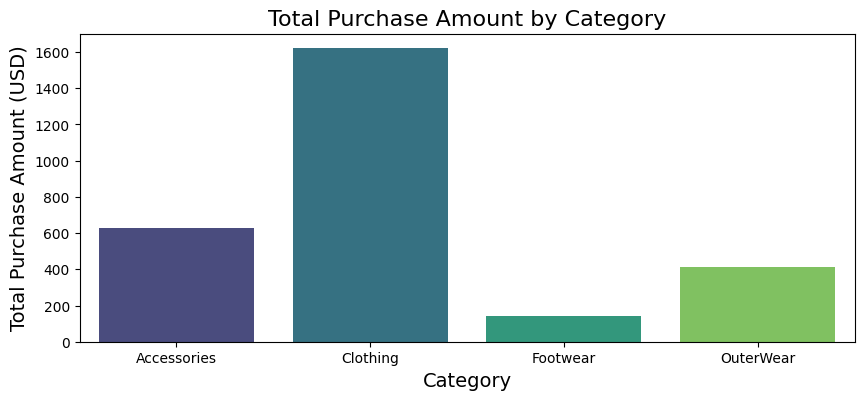

In [14]:
# Create a pivot table to calculate the total purchase amount for each category
pivot_table = df1.pivot_table(values='PurchaseAmount_USD', index='Category', aggfunc='sum').reset_index()

# Print the pivot table to verify the results
print(pivot_table)

# Set the figure size for better visualization
plt.figure(figsize=(10, 4))

# Create a bar chart using seaborn to visualize the total purchase amount by category
sns.barplot(data=pivot_table, x='Category', y='PurchaseAmount_USD', palette='viridis')

# Add a title to the bar chart
plt.title('Total Purchase Amount by Category', fontsize=16)

# Label the x-axis
plt.xlabel('Category', fontsize=14)

# Label the y-axis
plt.ylabel('Total Purchase Amount (USD)', fontsize=14)

# Display the bar chart
plt.show()


**Insight**

The total purchase amount for "Clothing" is significantly higher than other categories, reaching 1620 USD,  while "Footwear" has the lowest at 144 USD. This suggests that clothing is the most popular or highest-selling category, while footwear may need attention in terms of sales strategy.


## **Visualization No.2: Seasonal Purchasing Trends**

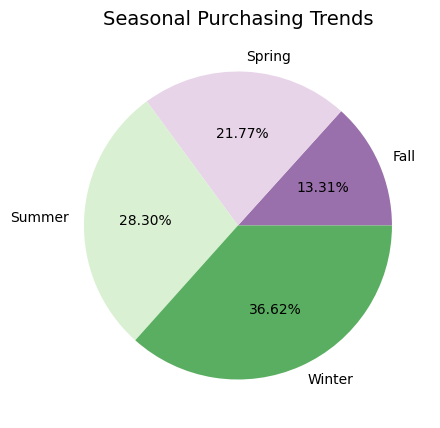

In [21]:
# Set the figure size for the pie chart to make it more readable
plt.figure(figsize=(7, 5))

seasonal_trends = df1

# Group data by 'Season' to calculate the total purchase amount per season for a clearer, aggregated pie chart.
seasonal_trends= seasonal_trends.groupby('Season', as_index=False)['PurchaseAmount_USD'].sum()

# Create a pie chart using Matplotlib
plt.pie(seasonal_trends['PurchaseAmount_USD'],                  # provides the data values for each slice
        labels=seasonal_trends['Season'],                       # provides the labels for each slice (seasons)
        autopct='%1.2f%%',                                      # shows the percentage of each slice with 2 decimal points
        colors=sns.color_palette("PRGn", len(seasonal_trends))) # assigns unique colors from the "PRGn" palette based on the number of rows in the DataFrame. 

# Set the title for the pie chart 
plt.title('Seasonal Purchasing Trends', fontsize=14)

# Display the pie chart 
plt.show()


**Insight**

The pie chart reveals that Winter and Summer drive the highest purchasing activity, 
with Winter at 36.62% and Summer at 28.30%. This suggests businesses could focus on promoting products during these seasons to maximize sales.
Spring and Fall show lower purchasing trends, indicating less demand in these periods.

## **Visualization No.3:Total Sales with and without Discounts**


    DiscountApplied  PurchaseAmount_USD
0     With Discount              2194.0
1  Without Discount               608.0


C:\Users\Sonal\AppData\Local\Temp\ipykernel_15112\932646040.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=discount_pivot,x='DiscountApplied',y='PurchaseAmount_USD',palette='Greens')


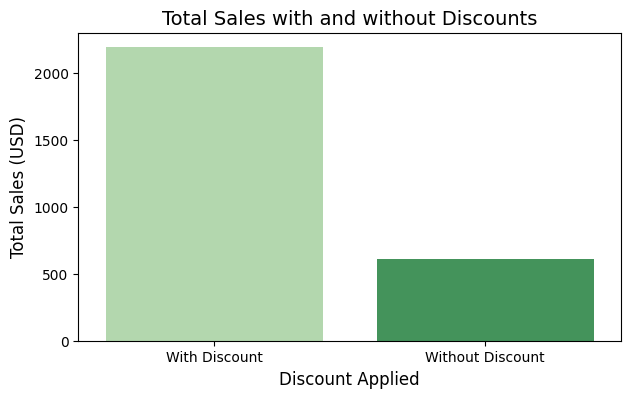

In [22]:
# Replace 1 with 'With Discount' and 0 with 'Without Discount' in the 'DiscountApplied' column
df1['DiscountApplied'] = df1['DiscountApplied'].replace({1: 'With Discount', 0: 'Without Discount'})

# Create the pivot table to calculate the total purchase amount grouped by 'DiscountApplied'
discount_pivot = df1.pivot_table(values='PurchaseAmount_USD',  # Specify the column to aggregate
                                index='DiscountApplied',     # Group by 'DiscountApplied' column
                                aggfunc='sum').reset_index()  # Apply sum function and reset index for a clean DataFrame

# Display the pivot table to verify the aggregation results
print(discount_pivot)

# Set the figure size for the bar chart to make it more readable
plt.figure(figsize=(7, 4))

# Create a bar plot using Seaborn to visualize the total sales with and without discounts and 
# Data for plotting: x-axis represents DiscountApplied categories, y-axis shows total sales (purchase amount), and bars are colored using the 'Greens' palette

sns.barplot(data=discount_pivot,x='DiscountApplied',y='PurchaseAmount_USD',palette='Greens')      
       
                              
# Add a title to the bar chart to describe what it shows
plt.title('Total Sales with and without Discounts', fontsize=14)

# Label the x-axis to indicate what the categories represent (Discount Applied or Not)
plt.xlabel('Discount Applied', fontsize=12)

# Label the y-axis to indicate the total sales amount in USD
plt.ylabel('Total Sales (USD)', fontsize=12)

# Display the bar chart 
plt.show()


**Insight**

The total sales with discounts applied (2194USD) are significantly higher than those without discounts (608 USD), indicating that offering discounts leads to increased sales. This suggests that promotions or discounts might be an effective strategy to boost sales.

## **Visualization No.4: Distribution of Preferred Payment Methods**


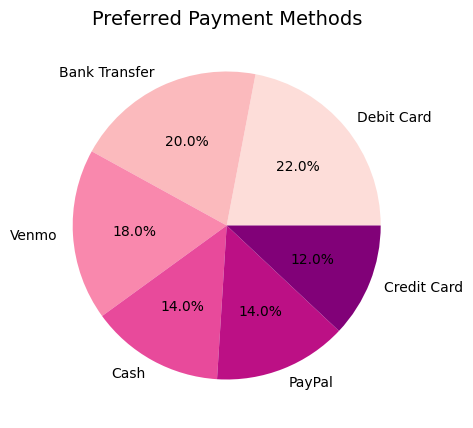

In [23]:
# Count the occurrences of each unique payment method in the 'PreferredPaymentMethod' column
payment_method_counts = df['PreferredPaymentMethod'].value_counts()

# Create a new figure for the plot with a specified size (7 inches by 5 inches)
plt.figure(figsize=(7, 5))

# Plot the pie chart using the payment_method_counts Series
# 'kind="pie"' draws a pie chart, 'autopct="%1.1f%%"' formats the percentage display on the slices to 1 decimal place, 
# and applies a Seaborn 'RdPu' color palette to the slices.
payment_method_counts.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('RdPu'))

# Add a title to the pie chart to describe what it represents
plt.title('Preferred Payment Methods', fontsize=14)

# Remove the default y-axis label (which is not needed for a pie chart) for clarity
plt.ylabel('')

# Display the pie chart
plt.show()


**Insight**

The pie chart shows that Debit Card is the most preferred payment method at 22%, 
followed by Bank Transfer at 20%. Venmo accounts for 18%, while PayPal and Cash each make up 14%. 
Credit Card is the least preferred method, with only 12%. This suggests that digital payment methods, especially Debit Card and Venmo, are the most popular choices.

## **Visualization No.5:Top 10 Highest Rated Products**


Products and Their Average Review Ratings:

   ProductName  ReviewRating
0       Blouse      3.266667
1         Coat      3.975000
2        Dress      4.550000
3      HandBag      4.600000
4          Hat      3.650000
5       Hoodie      4.100000
6       Jacket      3.900000
7        Jeans      3.100000
8      Jewelry      4.266667
9        Pants      3.614286
10     Sandals      3.500000
11       Scarf      4.100000
12       Shirt      2.933333
13       Shoes      4.100000
14      Shorts      4.366667
15       Skirt      2.800000
16    Sneakers      2.900000
17       Socks      2.900000
18  Sunglasses      4.500000
19     Sweater      3.850000
20     T-shirt      4.600000


C:\Users\Sonal\AppData\Local\Temp\ipykernel_15112\1704182016.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ProductName', y='ReviewRating', data=top_rated_products, palette='coolwarm')


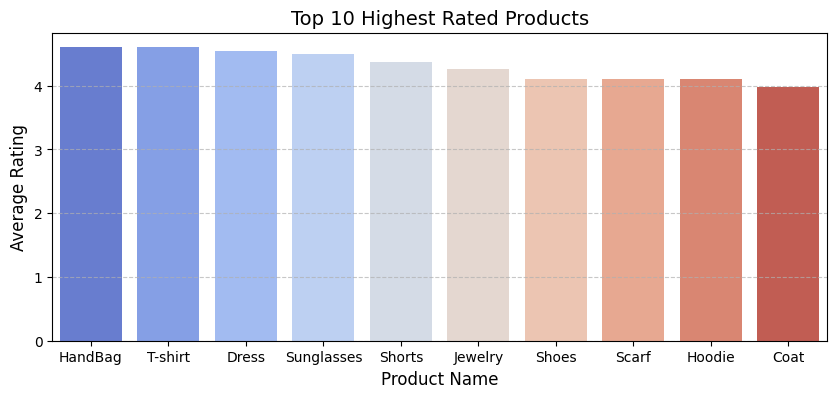

In [83]:
# Group by 'ProductName' and calculate the average rating for each product
product_ratings = df1.groupby('ProductName')['ReviewRating'].mean().reset_index()

# Title for the dataset
print("Products and Their Average Review Ratings:\n")

# Display the DataFrame with the product names and their average ratings
print(product_ratings)

# Sort the products by Rating in descending order
product_ratings = product_ratings.sort_values(by='ReviewRating', ascending=False)

# Get the top 10 products with the highest average ratings
top_rated_products = product_ratings.head(10)

# Set the figure size for the plot
plt.figure(figsize=(10, 4))

# Create a  bar chart to visualize the top 10 highest-rated products
sns.barplot(x='ProductName', y='ReviewRating', data=top_rated_products, palette='coolwarm')

# Set labels and title
plt.xlabel('Product Name', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.title('Top 10 Highest Rated Products', fontsize=14)

# Add grid only on the y-axis for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


**Insight**

HandBag and T-shirt both have the highest rating of 4.6, indicating strong customer approval. Dress (4.55) and Sunglasses (4.5) are also highly rated. Fashion items and accessories seem to have higher customer satisfaction. Shirt, with a rating of 2.93, shows potential for improvement in quality or design.

## **Visualization No.6: Total Purchases per Shipping Method**


  ShippingTypeName  PurchaseID
0   2-Day Shipping           5
1          Express          10
2    Free Shipping          12
3     Next Day Air           7
4         Standard           4
5     Store Pickup          12


C:\Users\Sonal\AppData\Local\Temp\ipykernel_15112\1430277497.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=shipping_pivot, x='ShippingTypeName', y='PurchaseCount', palette='coolwarm')


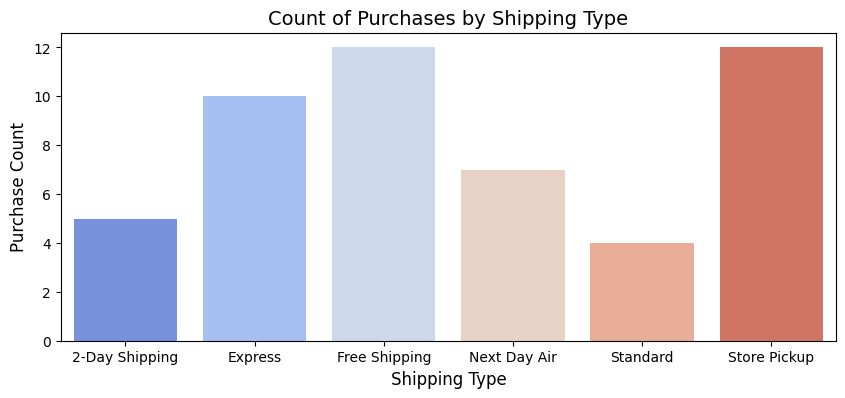

In [25]:
# Create a pivot table to count occurrences of each Shipping Type
shipping_pivot = df1.pivot_table(values='PurchaseID',  # Count the occurrences of 'PurchaseID' for each shipping type
                                 index='ShippingTypeName',  # Group the data by 'ShippingTypeName'
                                 aggfunc='count').reset_index()  # Apply count aggregation function and reset the index
# The pivot table now shows how many times each shipping type has been used in purchases
print(shipping_pivot)  # Print the pivot table 

# Rename the columns for better readability
shipping_pivot.columns = ['ShippingTypeName', 'PurchaseCount']  # Rename columns to make it clearer
# Now, 'ShippingTypeName' represents the shipping methods and 'PurchaseCount' represents the number of occurrences

# Plot the count of each shipping type
plt.figure(figsize=(10, 4))  # Set the size of the plot (width, height)

# Create a bar plot using seaborn to visualize the data from the pivot table
# `x='ShippingTypeName'` represents shipping types on the x-axis, `y='PurchaseCount'` represents the count of purchases on the y-axis, and the 'coolwarm' palette adds color variation to the bars.
sns.barplot(data=shipping_pivot, x='ShippingTypeName', y='PurchaseCount', palette='coolwarm')  


plt.title('Count of Purchases by Shipping Type', fontsize=14)  # Set the title of the plot with font size
plt.xlabel('Shipping Type', fontsize=12)  # Label for the x-axis, with font size for clarity
plt.ylabel('Purchase Count', fontsize=12)  # Label for the y-axis, with font size for clarity

plt.show()  # Display the plot 


**Insight**

Free Shipping and Store Pickup have the highest frequency with 12 purchases each, indicating strong customer preference for no extra shipping cost or in-store collection. Express shipping follows closely with 10, while Standard shipping has the lowest count at 4, suggesting it's less preferred.

## **Visualization No.7: Top 10 Most Ordered Products**


  ProductName  OrderCount
0       Pants           7
1        Coat           4
2       Dress           4
3      Shorts           3
4      Blouse           3
5     HandBag           3
6       Shirt           3
7     Jewelry           3
8     Sweater           2
9     T-shirt           2


C:\Users\Sonal\AppData\Local\Temp\ipykernel_15112\750261935.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='OrderCount', y='ProductName', data=top_10_products, palette='viridis')


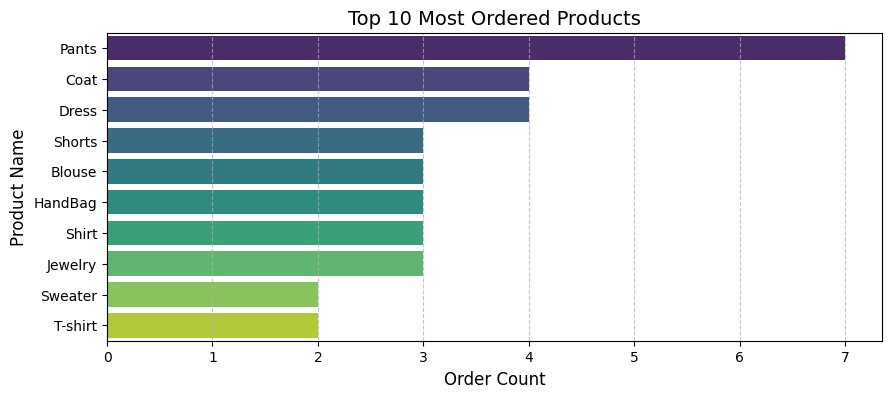

In [70]:
# Count the number of times each product is ordered, sort them, and select the top 10 products
top_10_products = df1['ProductName'].value_counts().head(10).reset_index()
top_10_products.columns = ['ProductName', 'OrderCount']  # Rename columns for better understanding
print(top_10_products)

# Set the figure size for better visualization
plt.figure(figsize=(10, 4))

# Create a horizontal bar chart to display the top 10 most ordered products
sns.barplot(x='OrderCount', y='ProductName', data=top_10_products, palette='viridis')

plt.xlabel('Order Count', fontsize=12)  # Label for the x-axis
plt.ylabel('Product Name', fontsize=12)  # Label for the y-axis
plt.title('Top 10 Most Ordered Products', fontsize=14)  # Title of the chart

# Add a grid only on the x-axis for better readability of order counts
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Dashed grid lines with transparency

# Display the plot
plt.show() 

**Insight**

Pants are the most ordered item, followed by Coat and Dress. Other products like Shorts, Blouse, and HandBag have moderate demand, while Sweater and T-shirt show the least orders, indicating lower customer interest.

# **Conclusion:**


The Shopping Trends Analysis provides valuable insights into customer preferences and purchasing behavior on the e-commerce platform. It is evident that Clothing, Winter, and Discounts play a crucial role in driving sales. Free Shipping and Store Pickup are clear favorites among shipping methods, while Digital Payment Methods dominate customer choices.

**To achieve sustained growth:**

Focus on high-demand categories and seasons.

Improve the performance of low-rated products and less popular categories.

Leverage customer segmentation to deliver personalized experiences.

Continuously monitor and refine promotional and shipping strategies

# **Recommendation:**

**1.Enhance Clothing Sales Strategy:**

Since clothing is the highest-selling category, continue promoting clothing items aggressively. Introduce loyalty programs or personalized discounts to maintain momentum.

**2.Focus on Seasonal Promotions:**

Target Winter and Summer seasons with category-specific promotions and campaigns, as these are peak purchasing times. Introduce limited-time offers during Spring and Fall to drive demand in these low-activity periods.

**3.Leverage Discount Offers:**

Discounts have proven effective in increasing sales. Create a tiered discount system to incentivize higher spending, or consider seasonal discounts during Winter and Summer to maximize revenue.

**4.Improve Payment Method Options:**

Since Debit Card, Bank Transfer, and Venmo are the most preferred methods, ensure seamless experiences for these modes. Consider promotional offers for less preferred methods like Credit Card to boost their usage.

**5.Optimize Shipping Options:**

Free shipping and store pickup are preferred options. Expand free shipping eligibility or provide incentives for store pickups to enhance customer satisfaction. Reassess pricing and delivery times for Standard Shipping to make it more attractive.

**6.Enhance Product Ratings:**

Focus on improving low-rated products like shirts through customer feedback and quality enhancements. High-rated products like HandBag and T-shirt can be further promoted as flagship items to build brand trust.

**7.Revitalize Footwear and Less Popular Products:**

Consider targeted marketing campaigns or bundled offers to boost sales for low-performing categories like footwear and less-ordered products such as Sweater and T-shirt.

**8.Targeted Customer Segmentation:**

Use demographic and purchasing behavior data to segment customers effectively. Offer tailored promotions to specific segments, such as age or location-based discounts.

**9.Promotional Code Evaluation:**

Evaluate the performance of promotional codes by tracking their usage and conversion rates. Focus on the codes that drive the highest sales and engagement.

**10.Enhance Product Variety:**

Expand product lines in the most popular categories to cater to a broader audience. Introduce limited edition or seasonal collections to maintain customer interest.


# **Future Scope**

1.Enhanced Customer Segmentation: Use machine learning for targeted marketing.

2.Predictive Analytics: Forecast sales trends using historical data.

3.Real-Time Dashboards: Monitor sales, feedback, and inventory dynamically.

4.AI Product Recommendations: Suggest products based on purchase history.

5.Dynamic Pricing: Adjust prices based on demand and competition.

6.Improved Shipping: Offer faster, sustainable, and diverse shipping options.

7.Loyalty Programs: Reward repeat customers to boost retention.

8.Sentiment Analysis: Use NLP on reviews to identify improvement areas.

9.Category Expansion: Introduce new products based on market trends.

10.Social Media Integration: Leverage insights from customer behavior online.
